In [51]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm








beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


I=2.4
L = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 100e-3 # <E> [eV] = kb*T
T_l =  1e-3 # <E> [eV]
B = 0.060 # T for AD
B_ratio=1e-10
Z=1


c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



length = 182.43280000000 #m
T = length/(c*beta_rel)
s_per_turn = T





beta_x=10 
beta_y=4

disp_x=0.12
#disp_x=0

arc=dtk.LinearTransferMatrix(Q_x=5.44, Q_y=5.42,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=disp_x,disp_x_1=disp_x,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )

Parameters: $I=2.4 A, B=0.060 T, \beta_x=10 m,\beta_y=4,D_x=0.12 m T_\perp=100meV,T_\parallel=1meV,\epsilon_{x}=35*1e-6,\epsilon_{y}=35*1e-6,dp/p=1e-3$

In [59]:
num_particles=1000
#old
emittance=5*1e-6 #inital emittance
delta=5e-4

sigma_x = np.sqrt(beta_x*emittance)
sigma_px = np.sqrt(emittance*1/beta_x)
sigma_y = np.sqrt(beta_y*emittance)
sigma_py = np.sqrt(emittance*1/beta_y)
sigma_p = 5e-4


x =     np.random.normal(loc=0.0, scale=sigma_x,  size=num_particles)
px =    np.random.normal(loc=0.0, scale=sigma_px, size=num_particles)
y =     np.random.normal(loc=0.0, scale=sigma_y,  size=num_particles)
py =    np.random.normal(loc=0.0, scale=sigma_py, size=num_particles)
delta = np.random.normal(loc=0.0, scale=sigma_p,  size=num_particles)

dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=x,
        px=px,
        y=y,
        py=py,
        delta=delta,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()


dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,Z=Z,B_ratio=1e-3,
                                         Neutralisation_space_charge=0)

       


num_turns=int(3*1e7)
num_turns=int(7*1e6)
step=int(num_turns/100)

# initialize arrays
x = []
px = []
delta =[]
action_x = []
action_y = []



for i in tqdm(range(num_turns)):
    if i % step == 0:
        #x.append(dtk_particle.x)
        #px.append(dtk_particle.px)
        delta.append(dtk_particle.delta)
   
        # calculate action in horizontal plane
        action_x_temp = (dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
        action_x.append(action_x_temp)

        action_y_temp = (dtk_particle.y**2/beta_y + beta_y*dtk_particle.py**2)
        action_y.append(action_y_temp)
       
    
        

    arc.track(dtk_particle)
    dtk_cooler.track(dtk_particle)
    

# # convert arrays to numpy arrays
# x = np.array(x)
# px = np.array(px)
# action_x = np.array(action_x)
# delta = np.array(delta)

# convert arrays to numpy arrays
#x = np.percentile(x, 95, axis=1)
#px = np.percentile(px, 95, axis=1)
action_x = np.percentile(action_x, 95, axis=1)
action_y = np.percentile(action_y, 95, axis=1)
delta = np.percentile(delta, 95, axis=1)


time = np.arange(0, num_turns, step) * s_per_turn






100%|██████████| 7000000/7000000 [1:05:16<00:00, 1787.35it/s]


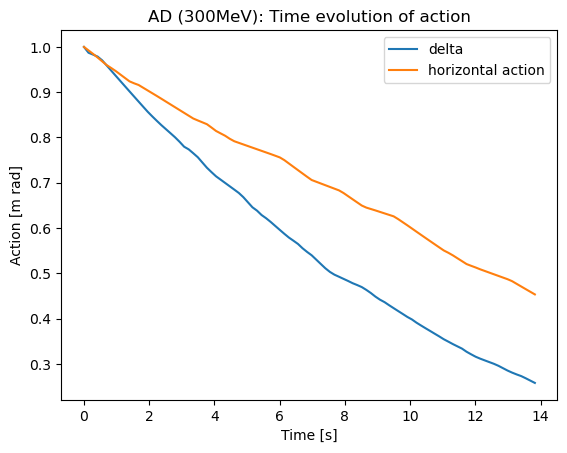

In [60]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(time,delta/delta[0],label='delta')
plt.plot(time,action_x/action_x[0],label='horizontal action')
plt.xlabel('Time [s]')
plt.ylabel('Action [m rad]')
plt.title('AD (300MeV): Time evolution of action')
plt.legend()
plt.ticklabel_format(useOffset=False)



In [61]:
#np.save("ipac/full_beam/t.npy", time)

#np.save("ipac/full_beam/x_b_ratio=1e-4.npy", action_x)
#np.save("ipac/full_beam/delta_b_ratio=1e-4.npy", delta)


# np.save("ipac/full_beam/x_b_ratio=1e-3.npy", action_x)
# np.save("ipac/full_beam/y_b_ratio=1e-3.npy", action_y)
# np.save("ipac/full_beam/delta_b_ratio=1e-3.npy", delta)



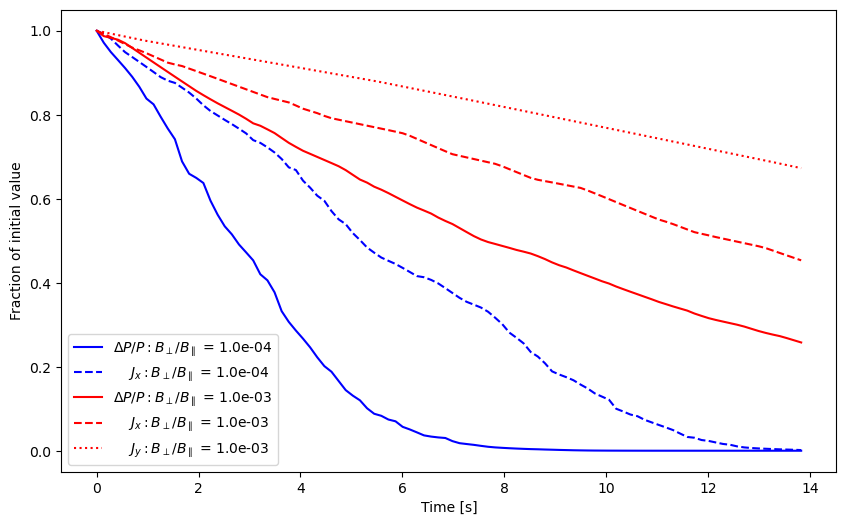

In [66]:
#Space charge 1 sigma
# load the data
time = np.load('ipac/full_beam/t.npy')


x_3 = np.load('ipac/full_beam/x_b_ratio=1e-3.npy')
y_3 = np.load('ipac/full_beam/y_b_ratio=1e-3.npy')

y_3 = np.percentile(y_3, 95, axis=1)

delta_3 = np.load('ipac/full_beam/delta_b_ratio=1e-3.npy')

x_4 = np.load('ipac/full_beam/x_b_ratio=1e-4.npy')
delta_4 = np.load('ipac/full_beam/delta_b_ratio=1e-4.npy')

# plot the horizontal and vertical action vs time
plt.figure(figsize=(10, 6))

plt.plot(time, delta_4/delta_4[0],color='b',linestyle='-'             ,label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time, x_4/x_4[0],color='b',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))

plt.plot(time, delta_3/delta_3[0],color='r',linestyle='-'               , label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.plot(time, x_3/x_3[0],color='r',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.plot(time, y_3/y_3[0],color='r',linestyle='dotted'                     , label="    $J_y:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.xlabel('Time [s]')
plt.ylabel('Fraction of initial value')
plt.legend()
plt.ticklabel_format(useOffset=False)